# Consumer & Visitor Insights For Neighborhoods (cbg_patterns)
## 1. Data Visualization and Data Summary
### 1.1 data summary

In [1]:
import pandas as pd  # data processing, csv file I/O
import numpy as np
import matplotlib.pyplot as plt
import time

# timekeeping
timekeeping = time.time()

# load csv file
data = pd.read_csv('../cbg_patterns.csv')

##### Descriptors of the raw datase

In [2]:
data.info()
data_shape = data.shape
print(data_shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220734 non-null  float64
 1   date_range_start          220735 non-null  int64  
 2   date_range_end            220735 non-null  int64  
 3   raw_visit_count           220629 non-null  float64
 4   raw_visitor_count         220629 non-null  float64
 5   visitor_home_cbgs         220735 non-null  object 
 6   visitor_work_cbgs         220735 non-null  object 
 7   distance_from_home        220518 non-null  float64
 8   related_same_day_brand    220735 non-null  object 
 9   related_same_month_brand  220735 non-null  object 
 10  top_brands                220735 non-null  object 
 11  popularity_by_hour        220735 non-null  object 
 12  popularity_by_day         220735 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory us

##### Find indexes of nominal and numerical data
remove the redundent column of row number

In [3]:
# Nominal index
nominal_index = ['visitor_home_cbgs', 'visitor_work_cbgs', 'related_same_day_brand', 'related_same_month_brand', 'top_brands', 'popularity_by_hour', 'popularity_by_day']
# Numerical index
numerical_index = ['census_block_group', 'date_range_start', 'date_range_end', 'raw_visit_count', 'raw_visitor_count', 'distance_from_home']

# Get frequency of each arrtibute
data_frequency = {key: data[key].value_counts() for key in data.columns}

#### Nominal data summary
- Show top 5 frequency values
- Bar chart visualization of nominal data frequency (Top 50)

Top 5 frequency of visitor_home_cbgs:
{} (99.95%) | {"060750601001":57} (0.01%) | {"220710133021":95} (0.01%) | {"220870302082":59} (0.01%) | {"270414509001":62} (0.01%) | 


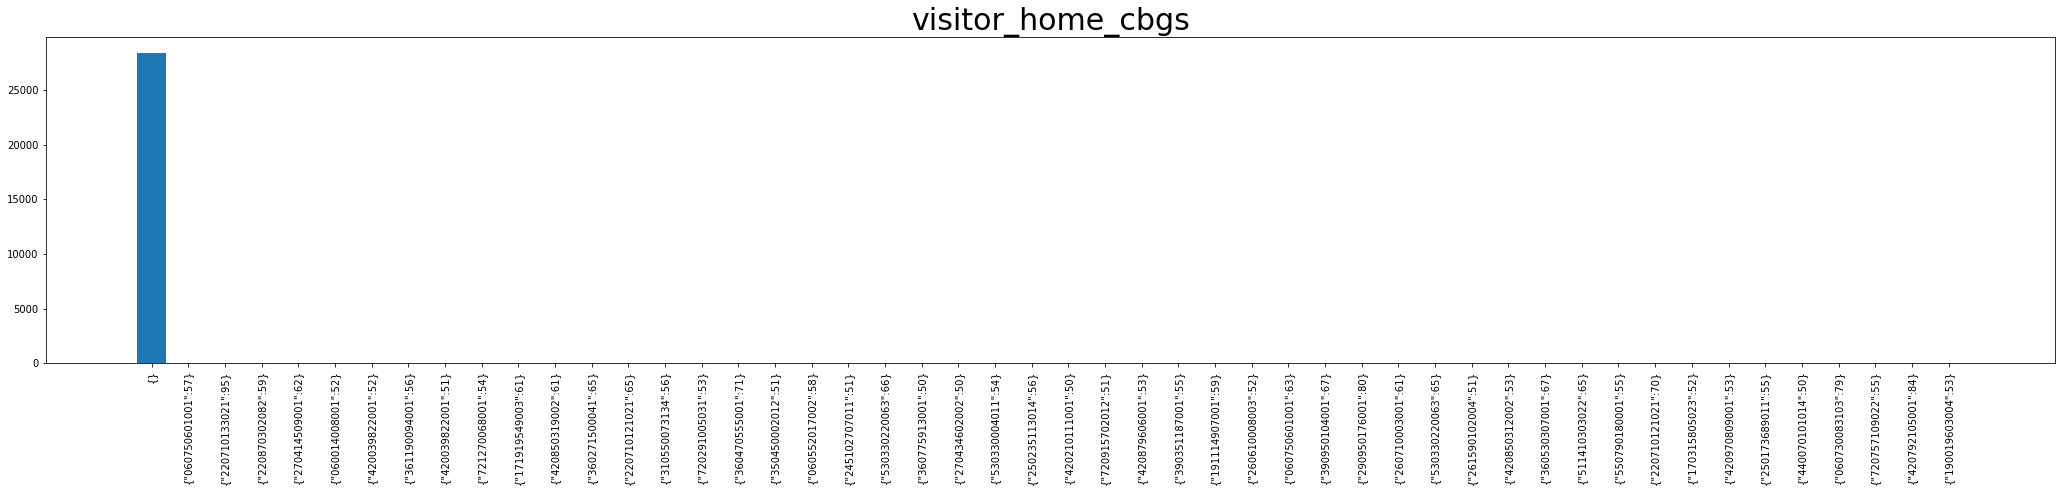

Top 5 frequency of visitor_work_cbgs:
{} (99.89%) | {"170318391001":53} (0.03%) | {"170318391001":54} (0.03%) | {"170318391001":58} (0.03%) | {"170318391001":50} (0.03%) | 


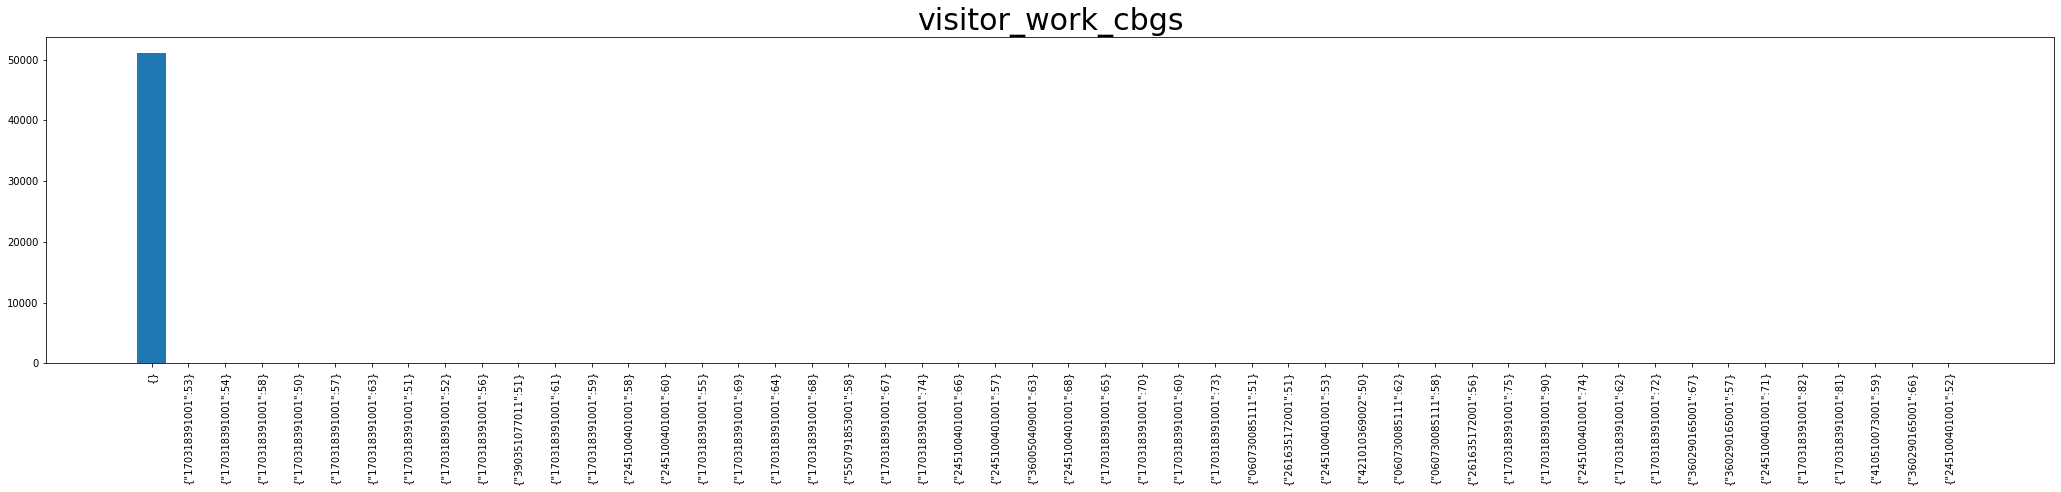

Top 5 frequency of related_same_day_brand:
[] (67.45%) | ["Dunkin' Donuts"] (13.30%) | ["starbucks"] (7.93%) | ["walmart"] (5.80%) | ["mcdonalds"] (5.52%) | 


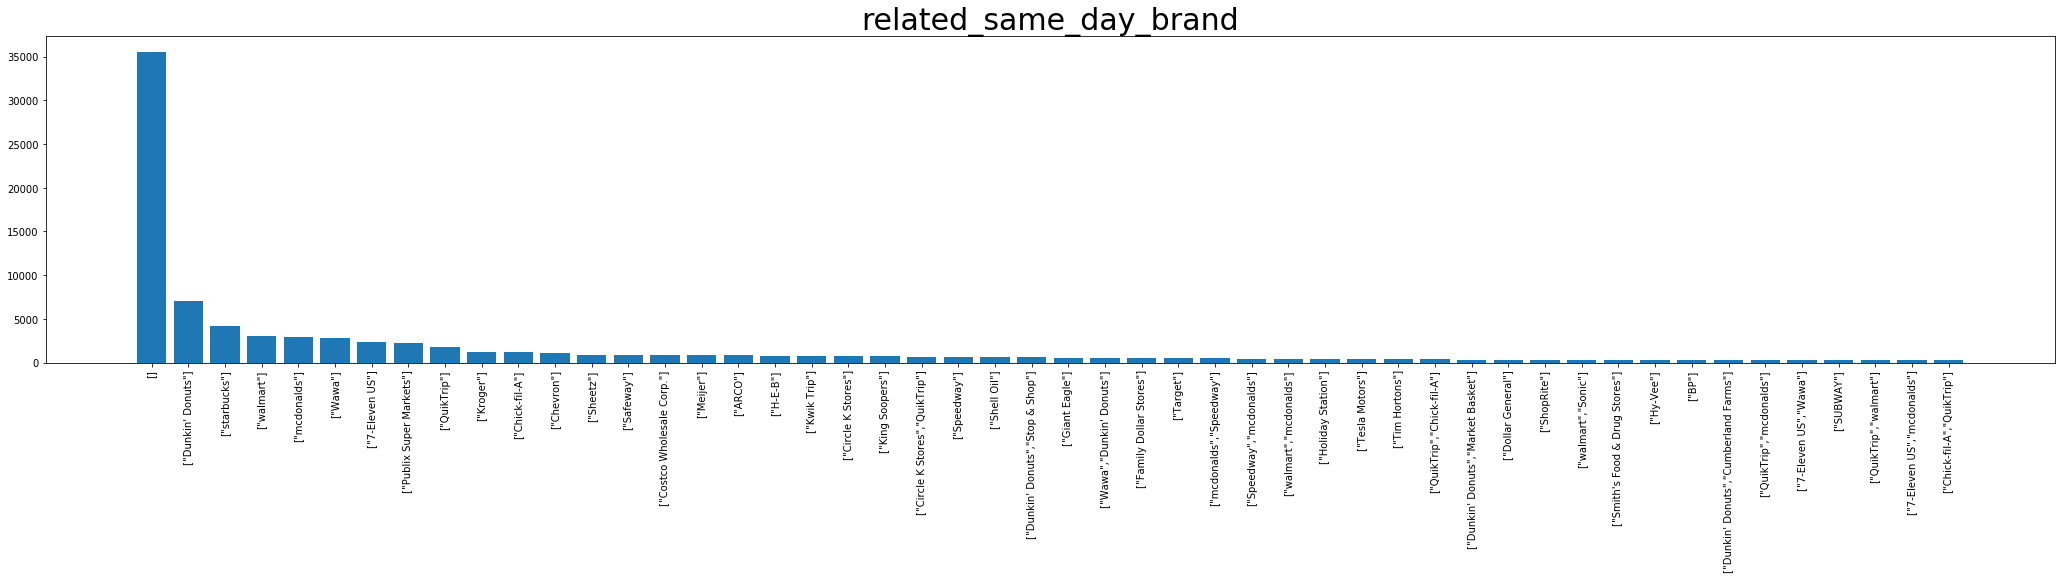

Top 5 frequency of related_same_month_brand:
[] (80.19%) | ["SmartStyle Family Hair Salons"] (9.01%) | ["Department of Veterans Affairs"] (4.19%) | ["H&R Block"] (3.60%) | ["Sprint"] (3.01%) | 


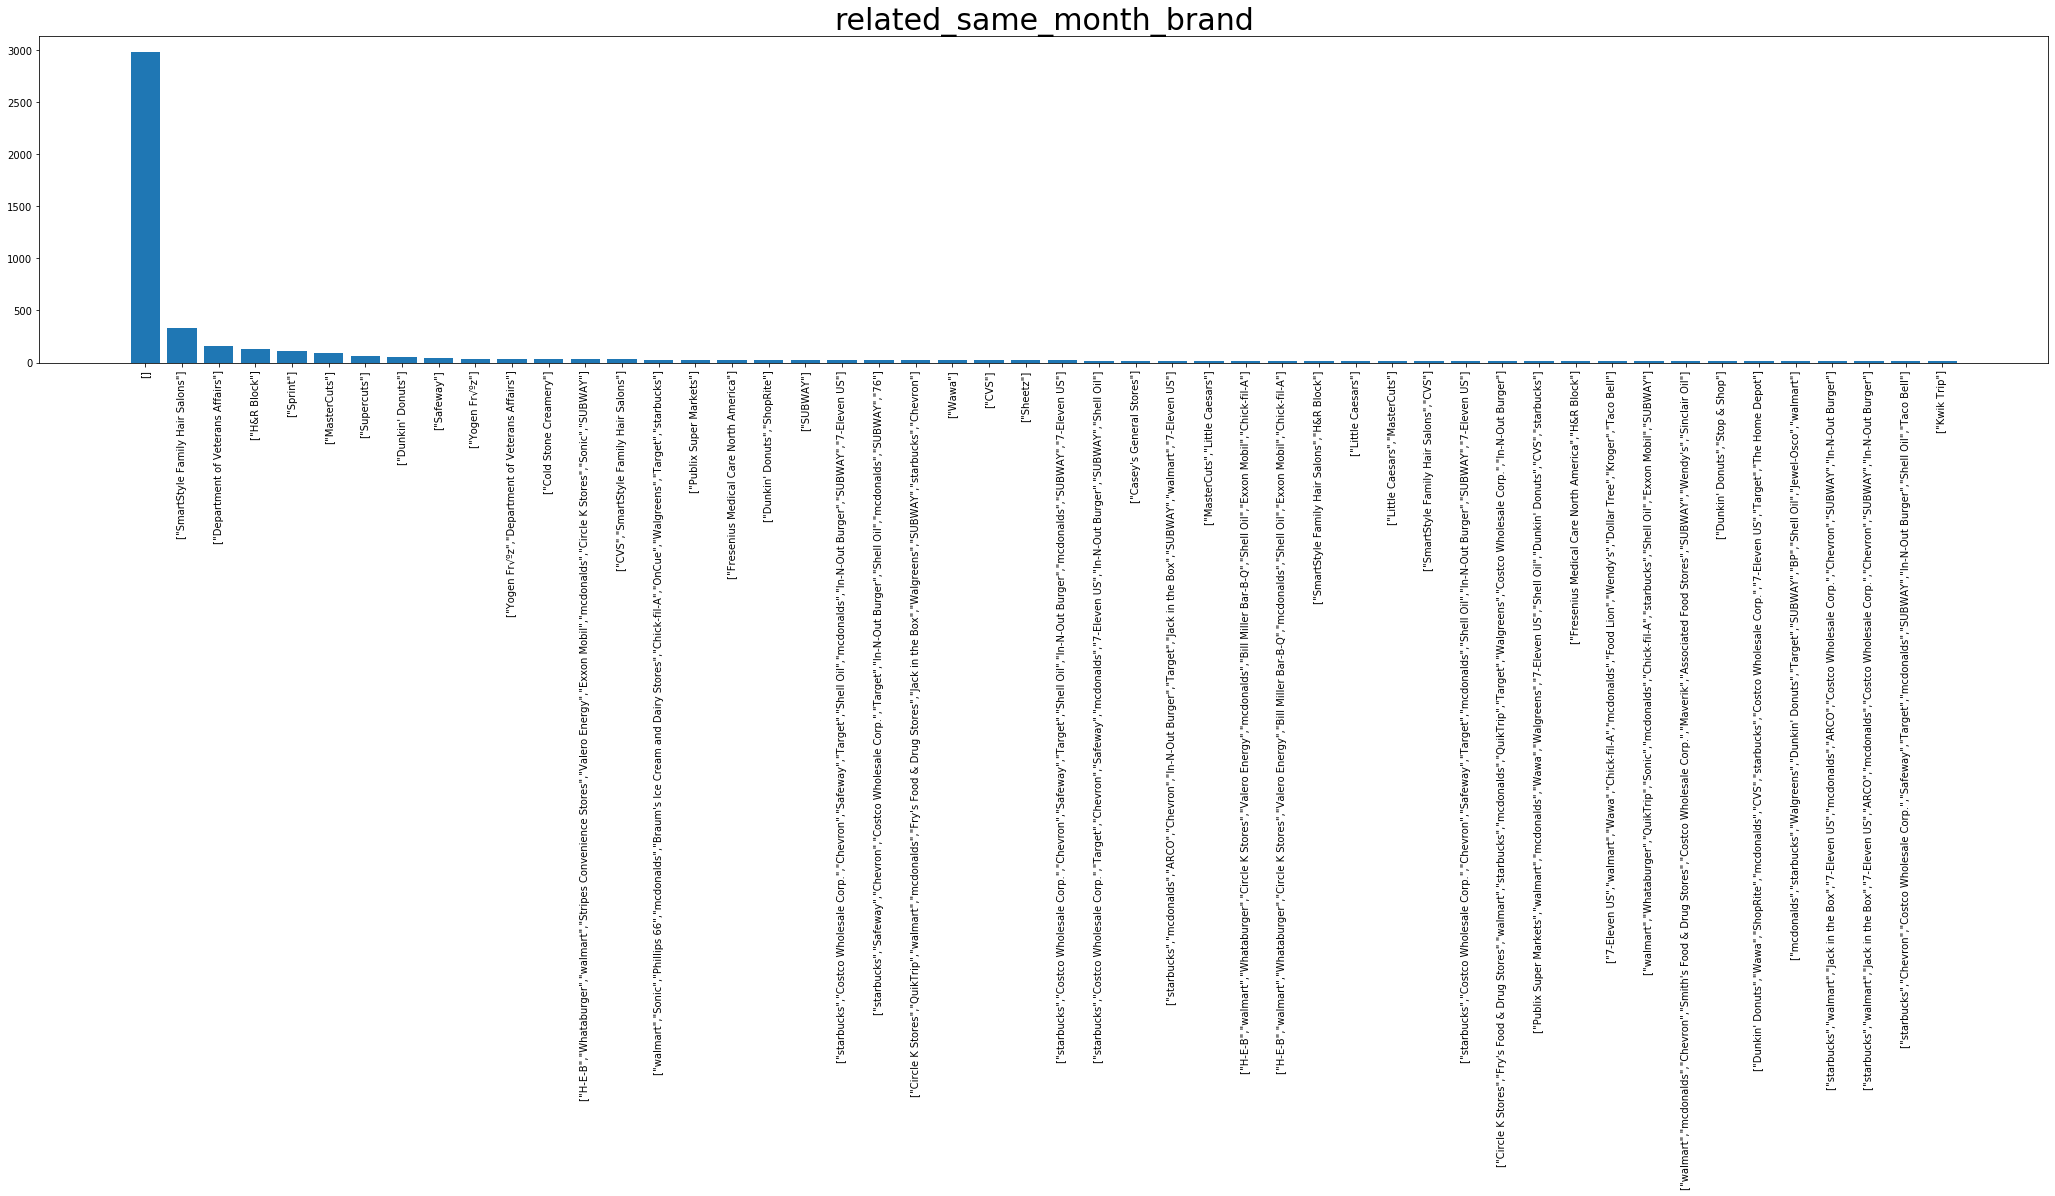

Top 5 frequency of top_brands:
[] (88.96%) | ["United States Postal Service (USPS)"] (6.39%) | ["Aflac (American Family Life Assurance)"] (1.81%) | ["Dollar General"] (1.56%) | ["National Association for the Education of Young Children (NAEYC)"] (1.28%) | 


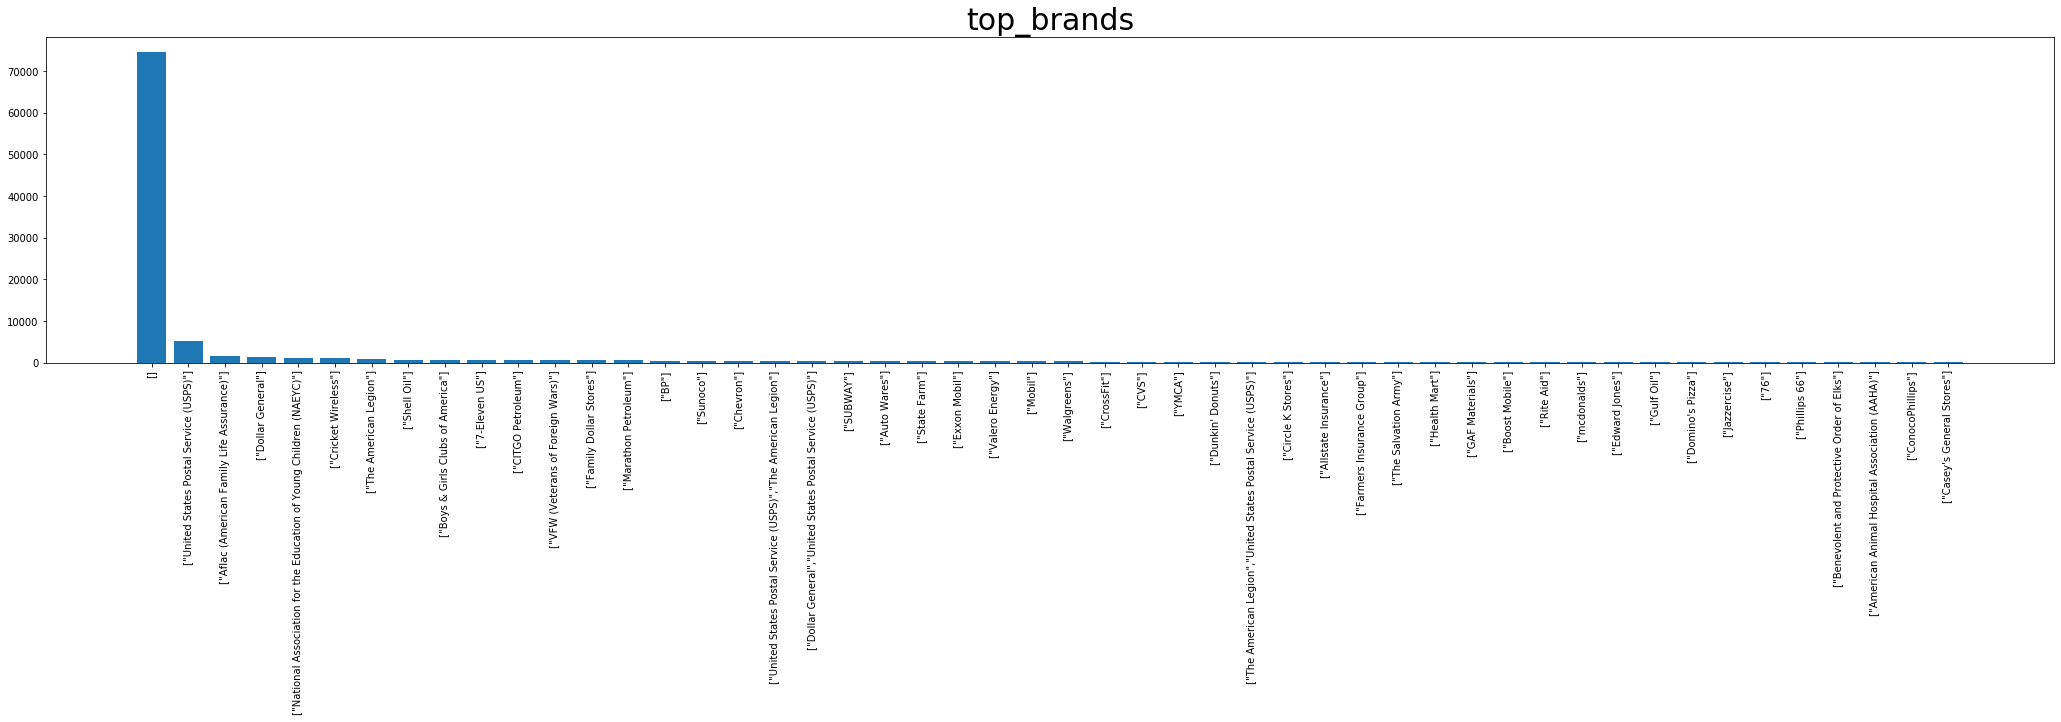

Top 5 frequency of popularity_by_hour:
[] (96.36%) | [1744,1672,1656,1653,1687,1813,2189,6236,4466,4443,4585,4711,4844,4657,5137,5300,4190,4520,3881,3495,3053,2561,2033,1878] (0.91%) | [2823,2704,2530,2549,2515,2614,3037,4312,4634,3769,3576,3544,3642,3779,4001,4721,4366,4279,4275,3953,3740,3686,3323,3021] (0.91%) | [1291,1256,1229,1260,1260,1499,1628,2227,1665,1676,1573,1726,1827,1692,1745,2331,2308,2122,2189,2059,1779,1745,1567,1467] (0.91%) | [1639,1583,1514,1475,1487,1690,2051,2922,2946,3042,3293,3544,3813,3683,3969,4127,4079,4239,3769,2950,2414,2092,1849,1746] (0.91%) | 


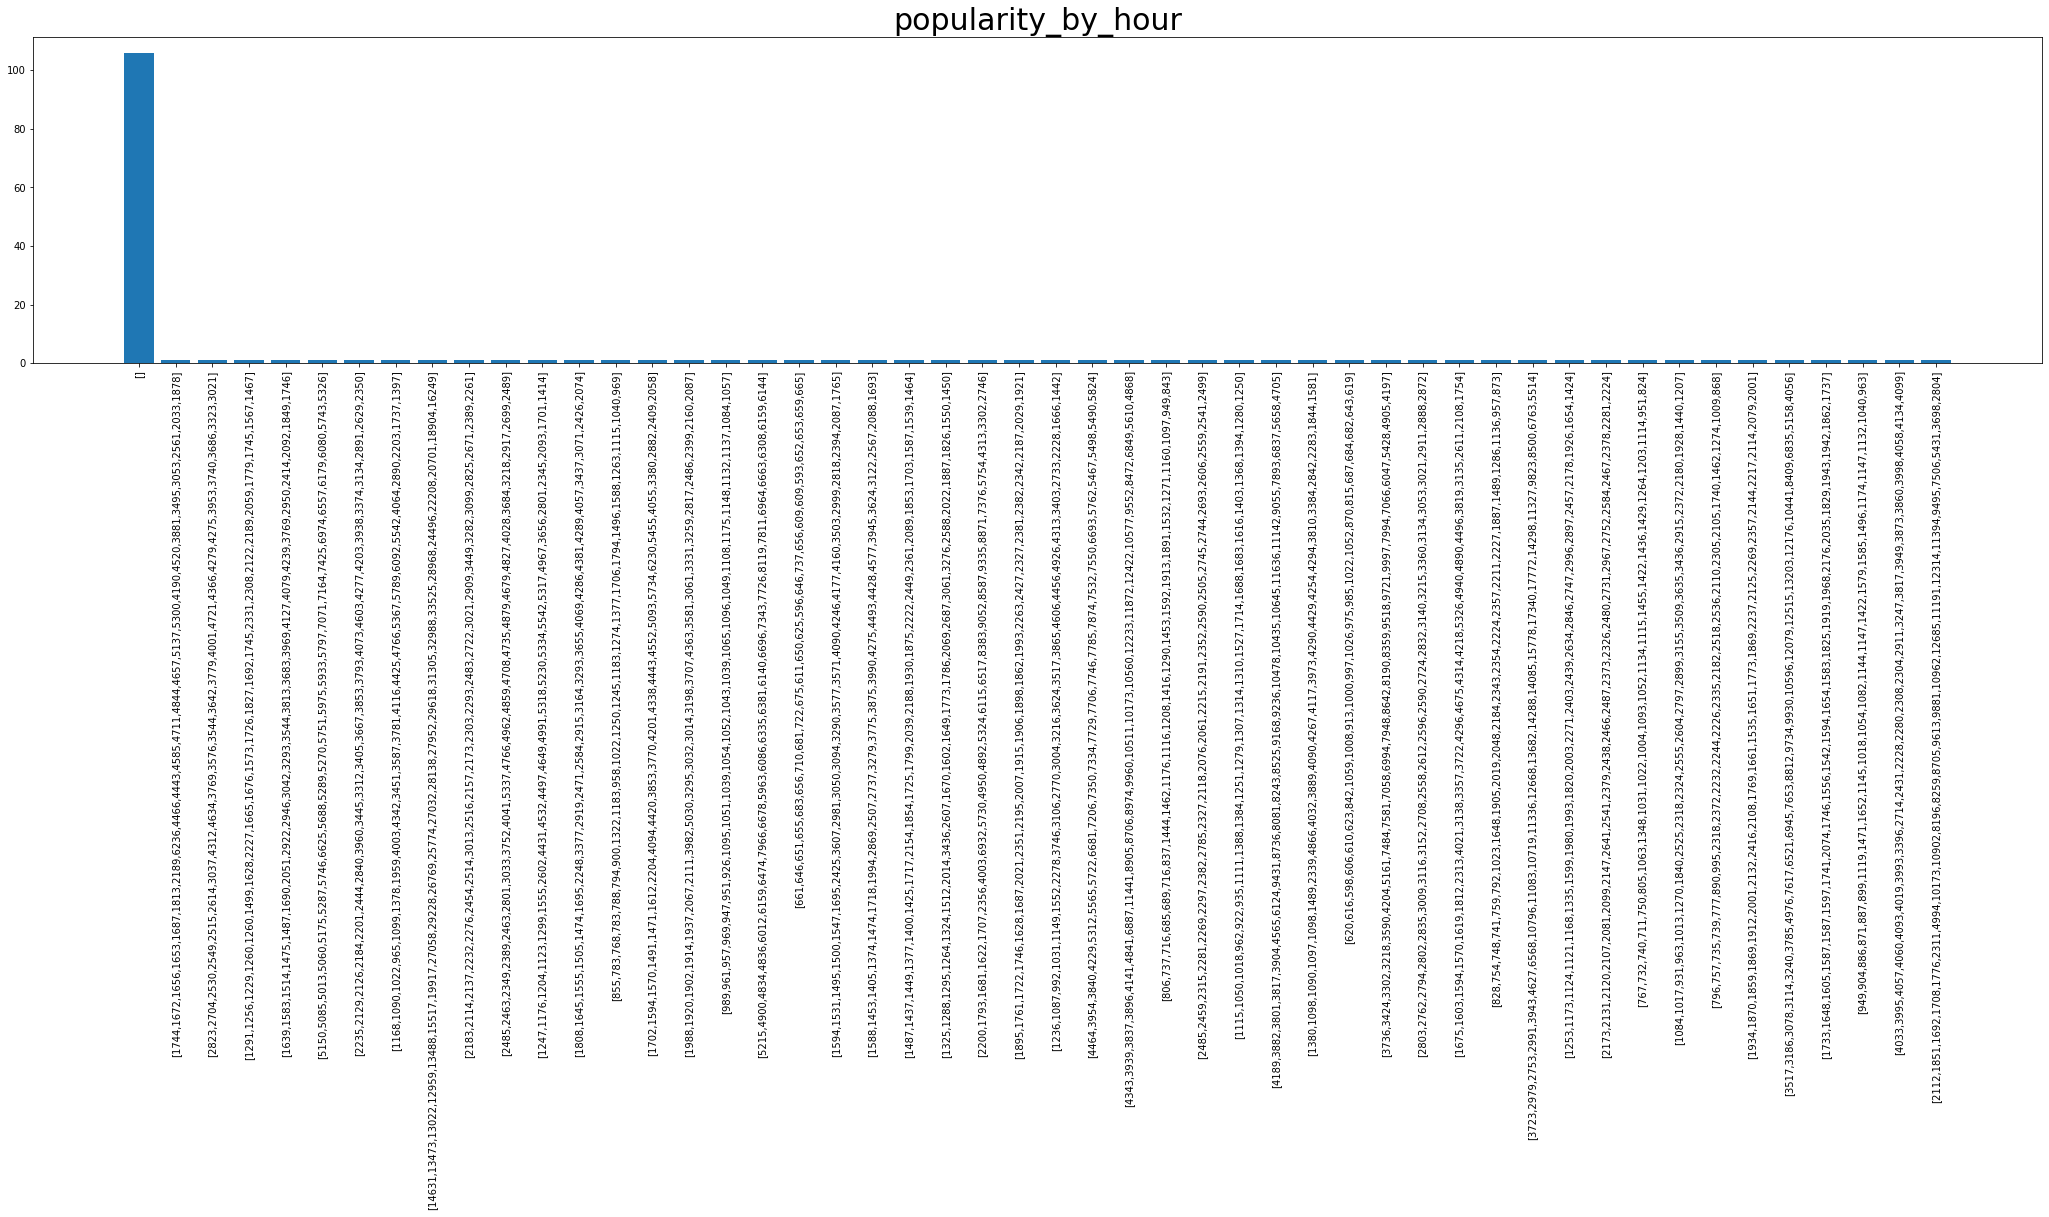

Top 5 frequency of popularity_by_day:
{} (96.36%) | {"Monday":5275,"Tuesday":5415,"Wednesday":5567,"Thursday":4612,"Friday":4439,"Saturday":3430,"Sunday":2943} (0.91%) | {"Monday":2786,"Tuesday":3070,"Wednesday":3067,"Thursday":2443,"Friday":2471,"Saturday":1861,"Sunday":1676} (0.91%) | {"Monday":3045,"Tuesday":3119,"Wednesday":3279,"Thursday":2380,"Friday":2617,"Saturday":2439,"Sunday":2343} (0.91%) | {"Monday":6817,"Tuesday":7631,"Wednesday":7714,"Thursday":6133,"Friday":6480,"Saturday":4002,"Sunday":3698} (0.91%) | 


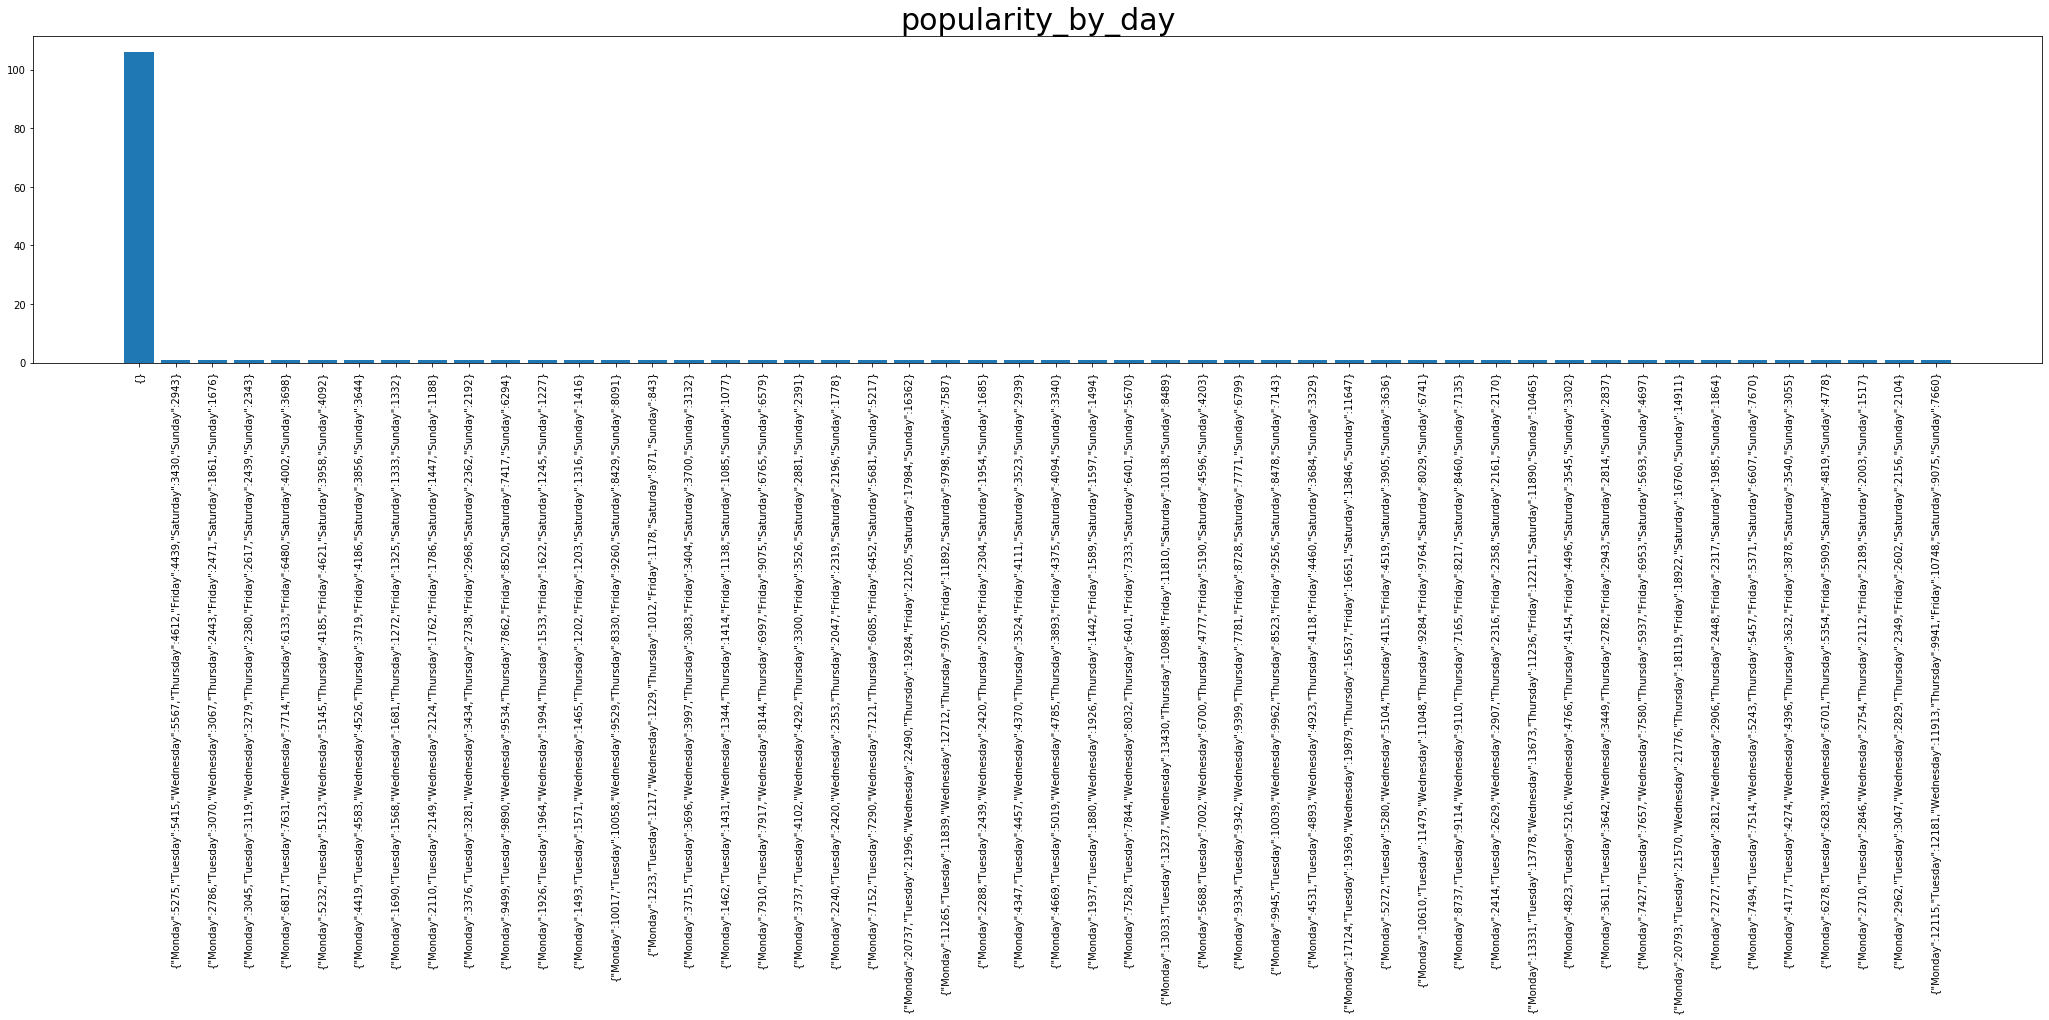

In [4]:
# bar chart for top 50 frequency of nominal_data
def bar_chart(nominal_data):
    x = nominal_data.index
    y = nominal_data.values
    
    print('Top 5 frequency of %s:'%nominal_data.name)
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print(s)
    
    plt.figure(figsize=(36,6))
    plt.title(nominal_data.name, fontsize=30)    
    plt.bar(x[:50], y[:50])
    plt.xticks(rotation=90)
    plt.show()

# bar chart for each attribute
for i in nominal_index:
    bar_chart(data_frequency[i])

#### Numerical data summary
- Five-number summary:
    - Min 
    - Q1(25%) 
    - Q2(50%)
    - Q3(75%)
    - Max

In [5]:
def data_describe(data):
    """
    Generate descriptive statistics.

    Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
    """
    print('descriptive statistics (%s):' % data.name)
    info = data.describe()
    print('Min: ', info['min'], '\tQ1 (25%): ', info['25%'], '\tQ2 (50%): ', info['50%'], '\tQ3 (75%): ', info['75%'], '\tMax:', info['max'])
    print('Missing: %d'%(data_shape[0] - info['count']))
    print('-'*100)

# five-number summary for each attribute
for i in numerical_index:
    data_describe(data[i])

descriptive statistics (census_block_group):
Min:  10010201001.0 	Q1 (25%):  131210116244.25 	Q2 (50%):  290190012013.5 	Q3 (75%):  420034897521.75 	Max: 780309900000.0
Missing: 1
----------------------------------------------------------------------------------------------------
descriptive statistics (date_range_start):
Min:  1538352000.0 	Q1 (25%):  1538352000.0 	Q2 (50%):  1538352000.0 	Q3 (75%):  1538352000.0 	Max: 1538352000.0
Missing: 0
----------------------------------------------------------------------------------------------------
descriptive statistics (date_range_end):
Min:  1541030400.0 	Q1 (25%):  1541030400.0 	Q2 (50%):  1541030400.0 	Q3 (75%):  1541030400.0 	Max: 1541030400.0
Missing: 0
----------------------------------------------------------------------------------------------------
descriptive statistics (raw_visit_count):
Min:  60.0 	Q1 (25%):  17042.0 	Q2 (50%):  30640.0 	Q3 (75%):  56678.0 	Max: 7179900.0
Missing: 106
-------------------------------------------

### 1.2 Data Visualization
#### Numerical data visualization
- histogram  
- box plot
- scatter matrix

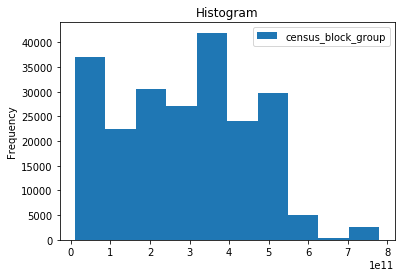

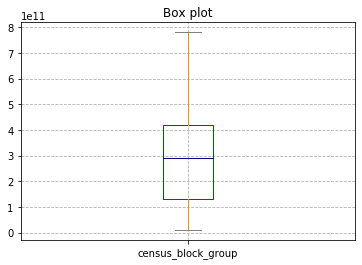

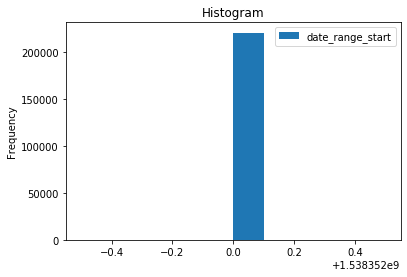

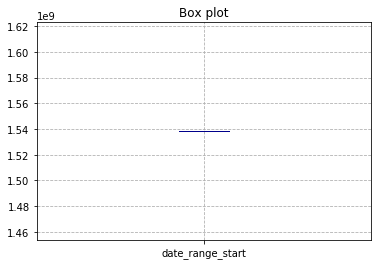

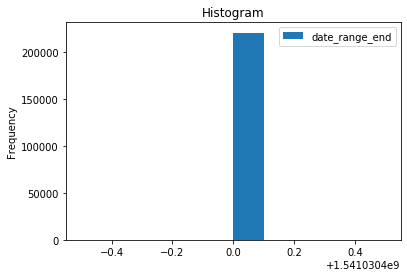

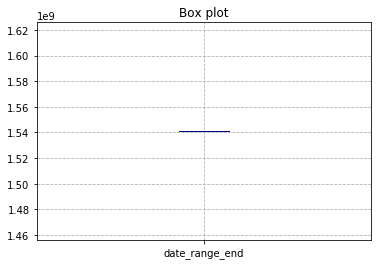

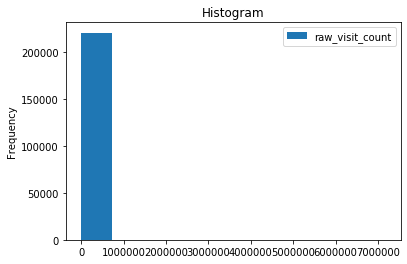

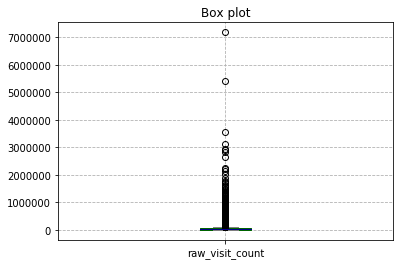

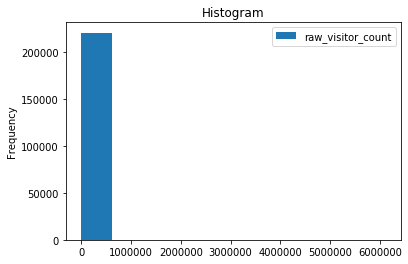

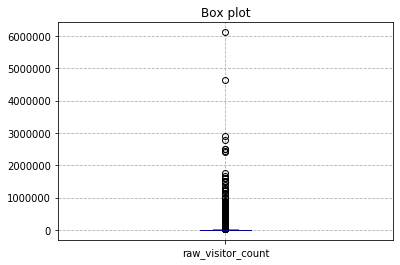

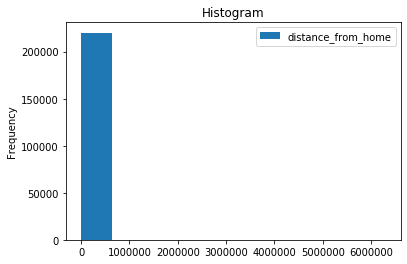

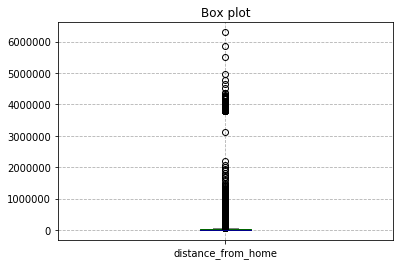

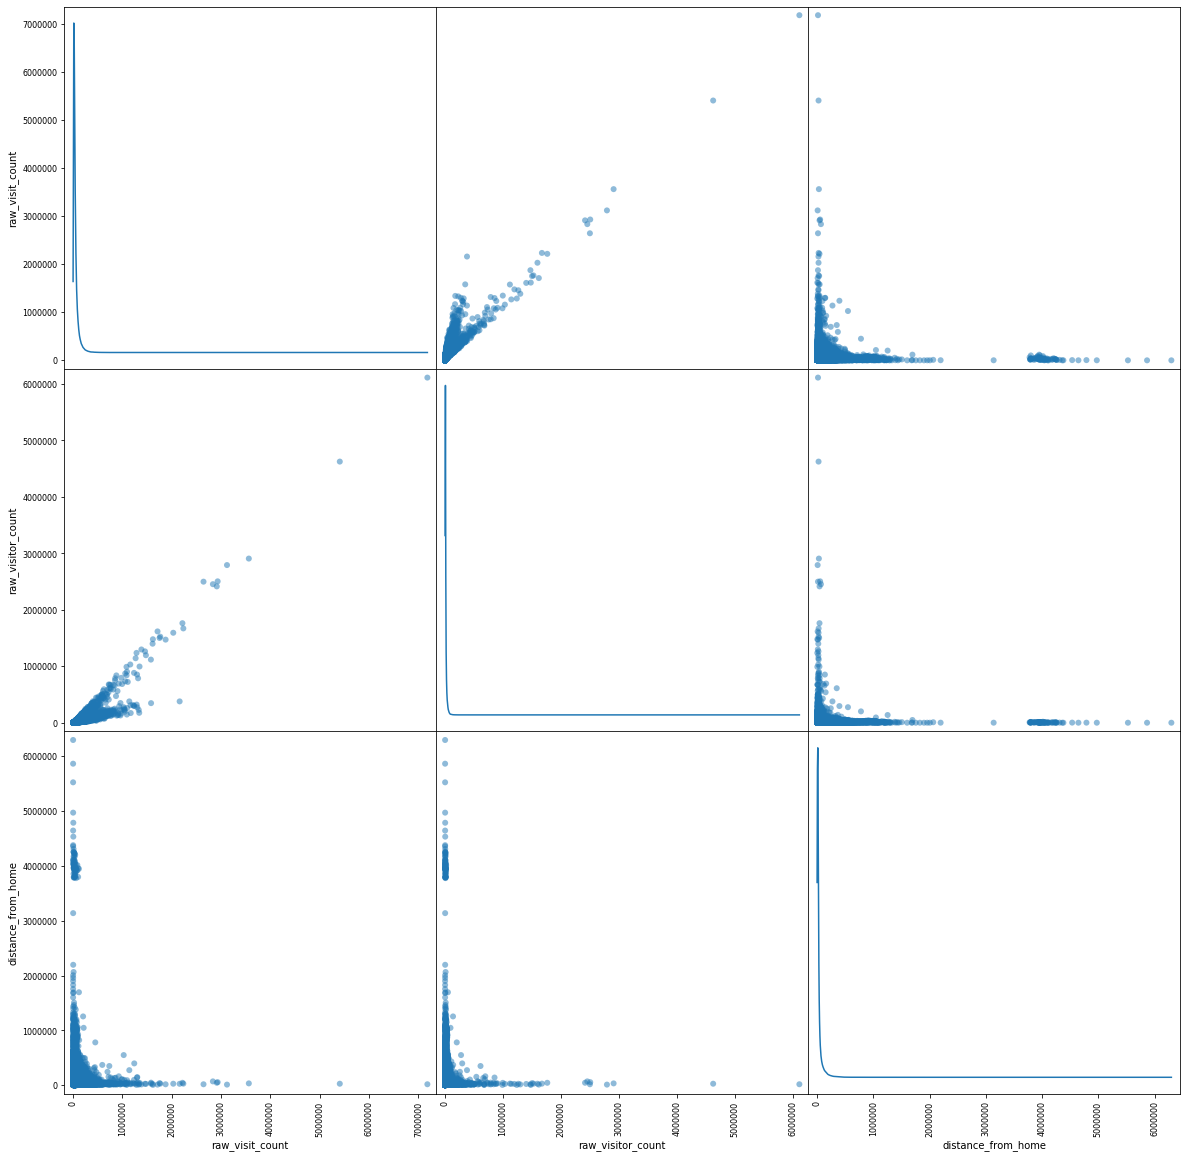

In [6]:
# histogram
def histogram(data):
    df = pd.DataFrame(data)
    df.plot.hist()
    plt.title('Histogram')
    plt.show()

# box plot
def box_plot(data):
    # boxes 箱线
    # whiskers 分为数于error bar横线之间的竖线的颜色
    # medians 中位线的颜色
    # caps error bar 横线的颜色
    color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
    data.plot.box(grid=True, color=color)   # color 样式填充
    plt.grid(linestyle='--')
    plt.title('Box plot')
    plt.show()

def box_plot1(data):
    df = pd.DataFrame(data)
    df.boxplot(sym = 'o',    #异常点形状
                   vert = True,          # 是否垂直
                   whis=1.5,             # IQR
                   patch_artist = True,  # 上下四分位框是否填充
                   meanline = False,showmeans = True,  # 是否有均值线及其形状
                   showbox = True,   # 是否显示箱线
                   showfliers = True,  #是否显示异常值
                   notch = False,    # 中间箱体是否缺口
                   return_type='dict')  # 返回类型为字典
    plt.grid(linestyle='--')
    plt.title('Box plot')
    plt.show()

# scatter plot
def scatter_plot(data1, index1, index2):
    data.plot.scatter(x=index1,
                   y=index2,
                   c='DarkBlue')
    plt.title('Scatter plot')
    plt.show()

for i in numerical_index:
    histogram(data[i])
    box_plot(data[i])

# scatter matrix
# The diagonal of the matrix is the KDE(Kernel Density Estimation) of ['raw_visit_count', 'raw_visitor_count', 'distance_from_home'] feature
pd.plotting.scatter_matrix(data[['raw_visit_count', 'raw_visitor_count', 'distance_from_home']], marker='o', figsize=(20, 20), diagonal='kde')
plt.show()

## 2. Processing of missing data

### 2.1 Remove missing values

In [7]:
# Remove missing values
data_remove = data.dropna()
data_remove.info()

# Get frequency of each arrtibute (after remove missing values)
data_remove_frequency = {key: data_remove[key].value_counts() for key in data_remove.columns}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220518 entries, 0 to 220628
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220518 non-null  float64
 1   date_range_start          220518 non-null  int64  
 2   date_range_end            220518 non-null  int64  
 3   raw_visit_count           220518 non-null  float64
 4   raw_visitor_count         220518 non-null  float64
 5   visitor_home_cbgs         220518 non-null  object 
 6   visitor_work_cbgs         220518 non-null  object 
 7   distance_from_home        220518 non-null  float64
 8   related_same_day_brand    220518 non-null  object 
 9   related_same_month_brand  220518 non-null  object 
 10  top_brands                220518 non-null  object 
 11  popularity_by_hour        220518 non-null  object 
 12  popularity_by_day         220518 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory us

#### compare with raw data
There is no missing data of nominal data, so we need no visualization 
numerical data compared visualization
- Compared histogram
- Compared box plot
- Compared scatter plot

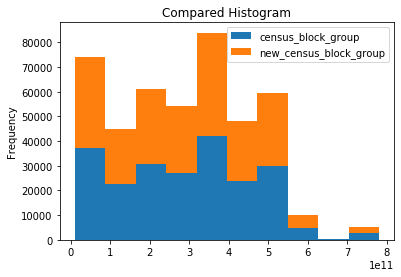

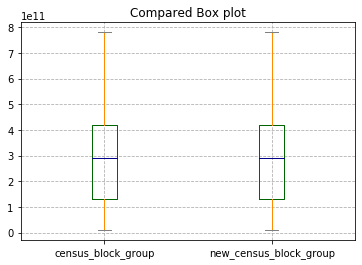

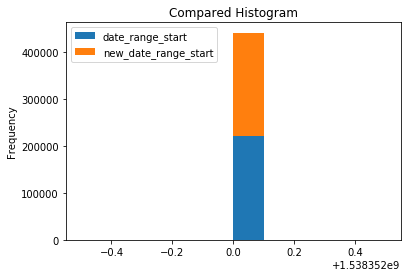

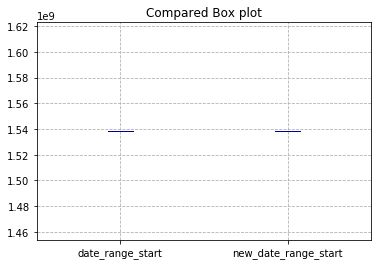

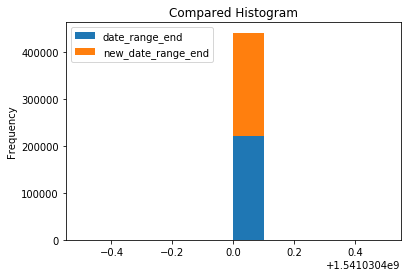

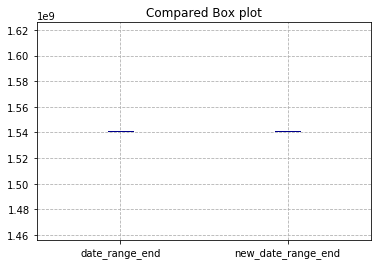

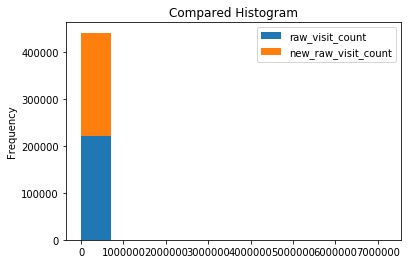

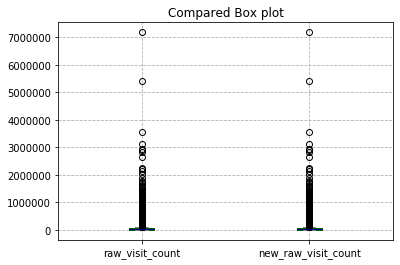

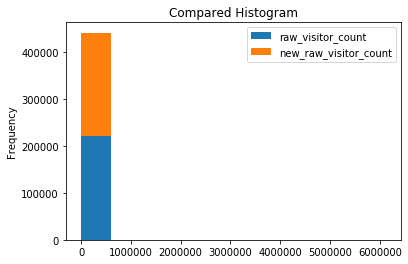

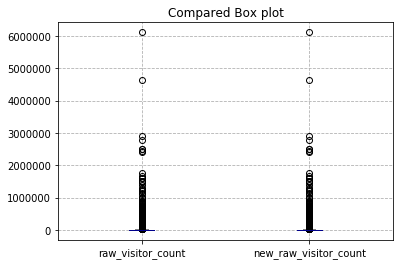

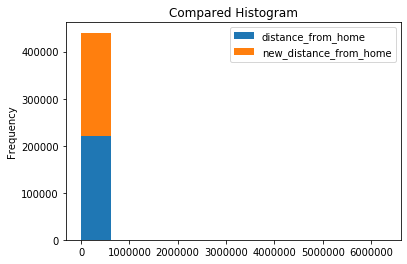

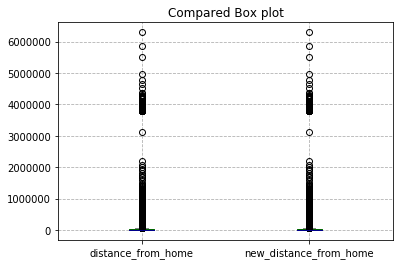

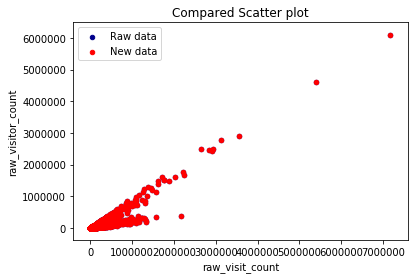

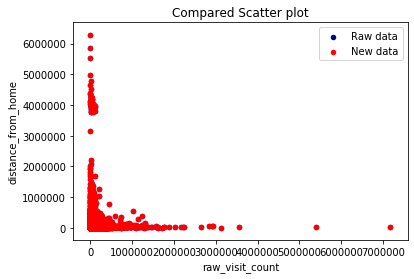

In [8]:
# histogram
def histogram_compare(raw_data, new_data):
    new_name = ['new_' + new_data.name]
    raw_data = pd.DataFrame(raw_data)
    new_data = pd.DataFrame(new_data)
    new_data.columns=new_name
    df = raw_data.append(new_data)
    df.plot.hist(stacked=True)
    plt.title('Compared Histogram')
    plt.show()

# box plot
def box_plot_compare(raw_data, new_data):
    # boxes 箱线
    # whiskers 分为数于error bar横线之间的竖线的颜色
    # medians 中位线的颜色
    # caps error bar 横线的颜色
    new_name = ['new_' + new_data.name]
    raw_data = pd.DataFrame(raw_data)
    new_data = pd.DataFrame(new_data)
    new_data.columns=new_name
    df = raw_data.append(new_data)
    color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
    df.plot.box(grid=True, color=color)   # color 样式填充
    plt.grid(linestyle='--')
    plt.title('Compared Box plot')
    plt.show()

# scatter plot
def scatter_plot_compare(data1, data2, index1, index2):
    ax = data1.plot.scatter(x=index1, y=index2, c='DarkBlue', label='Raw data')
    data2.plot.scatter(x=index1, y=index2, c='r', label='New data', ax=ax)
    plt.title('Compared Scatter plot')
    plt.show()
    
for i in numerical_index:
    histogram_compare(data[i], data_remove[i])
    box_plot_compare(data[i], data_remove[i])

scatter_plot_compare(data, data_remove, 'raw_visit_count', 'raw_visitor_count')
scatter_plot_compare(data, data_remove, 'raw_visit_count', 'distance_from_home')

Free the memory

In [9]:
del data_remove, data_remove_frequency

###  2.2 Fill NA/NaN values using the highest frequency value

In [10]:
# Fill NA/NaN values using the highest frequency value.
highest_frequency_values = {key: data[key].value_counts().index[0] for key in data.columns}
data_highest = data.fillna(value=highest_frequency_values)
data_highest.info()

# Get frequency of each arrtibute (after remove missing values)
data_highest_frequency = {key: data_highest[key].value_counts() for key in data_highest.columns}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220735 non-null  float64
 1   date_range_start          220735 non-null  int64  
 2   date_range_end            220735 non-null  int64  
 3   raw_visit_count           220735 non-null  float64
 4   raw_visitor_count         220735 non-null  float64
 5   visitor_home_cbgs         220735 non-null  object 
 6   visitor_work_cbgs         220735 non-null  object 
 7   distance_from_home        220735 non-null  float64
 8   related_same_day_brand    220735 non-null  object 
 9   related_same_month_brand  220735 non-null  object 
 10  top_brands                220735 non-null  object 
 11  popularity_by_hour        220735 non-null  object 
 12  popularity_by_day         220735 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory us

#### compare with raw data
There is no missing data of nominal data, so we need no visualization 
numerical data compared visualization
- Compared histogram
- Compared box plot
- Compared scatter plot

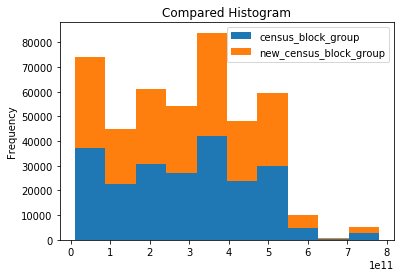

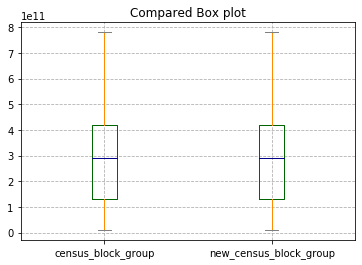

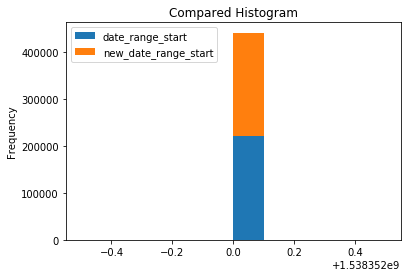

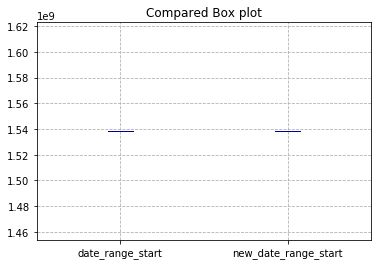

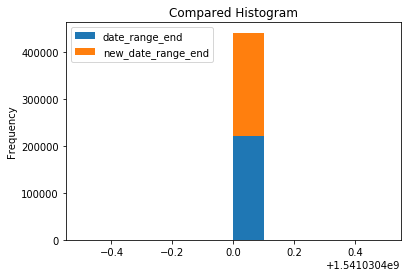

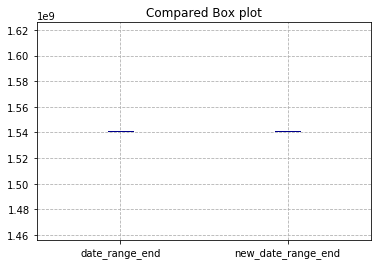

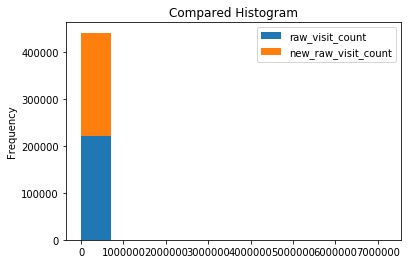

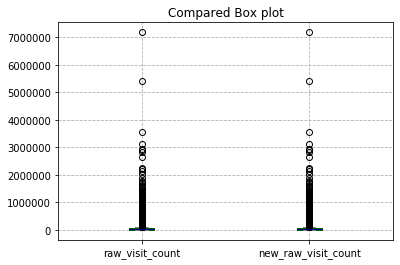

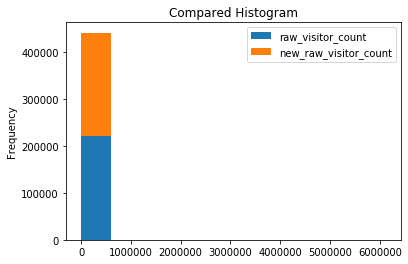

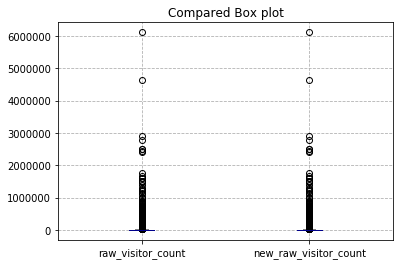

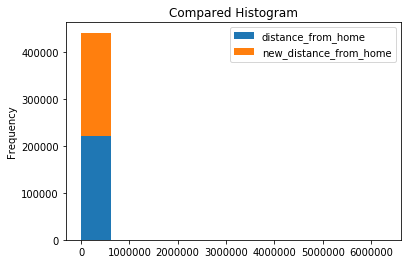

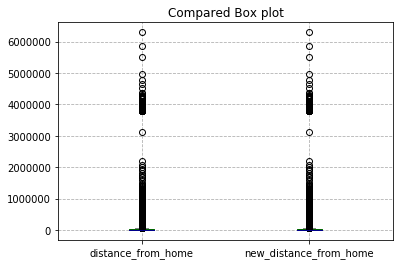

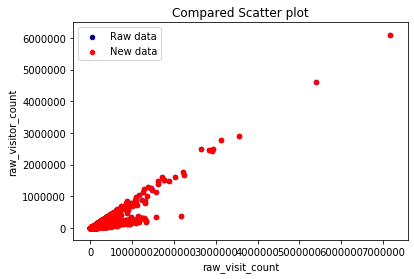

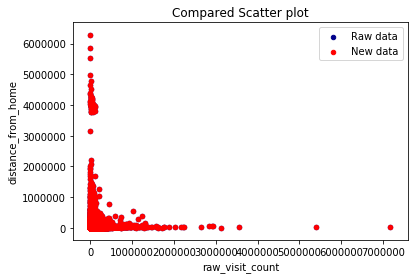

In [11]:
for i in numerical_index:
    histogram_compare(data[i], data_highest[i])
    box_plot_compare(data[i], data_highest[i])

scatter_plot_compare(data, data_highest, 'raw_visit_count', 'raw_visitor_count')
scatter_plot_compare(data, data_highest, 'raw_visit_count', 'distance_from_home')

Free the memory

In [12]:
del data_highest, data_highest_frequency

###  2.3 Fill in missing values by the correlation of the attribute
#### Random Forest Regressor
Missing attributes:
census_block_group (1) | raw_visit_count (106) | raw_visitor_count (106) | distance_from_home (217)

In [13]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_values(df, complete_index):
    
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
     # y is the know missing_index
    y = known_values[:, 0]
    
    # X are the features
    X = known_values[:, 1:]
    
    # fit
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # predict
    predicted_values = rfr.predict(unknow_values[:, 1:])
    
    print('fill in values of %s:'%missing_index, predicted_values)
     # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values 

First, fill in missing values of '**census_block_group**' using complete attribute data ('date_range_start' & 'date_range_end')

In [14]:
new_data = data.copy()
set_missing_values(new_data, ['census_block_group','date_range_start', 'date_range_end'])
new_data.info()

fill in values of census_block_group: [2.87094781e+11]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220735 non-null  float64
 1   date_range_start          220735 non-null  int64  
 2   date_range_end            220735 non-null  int64  
 3   raw_visit_count           220629 non-null  float64
 4   raw_visitor_count         220629 non-null  float64
 5   visitor_home_cbgs         220735 non-null  object 
 6   visitor_work_cbgs         220735 non-null  object 
 7   distance_from_home        220518 non-null  float64
 8   related_same_day_brand    220735 non-null  object 
 9   related_same_month_brand  220735 non-null  object 
 10  top_brands                220735 non-null  object 
 11  popularity_by_hour        220735 non-null  object 
 12  popularity_by_day         220735 non-null  ob

Second, fill in missing values of '**raw_visit_count**' using complete attribute data ('census_block_group' & 'date_range_start' & 'date_range_end')

In [15]:
set_missing_values(new_data, ['raw_visit_count', 'census_block_group', 'date_range_start', 'date_range_end'])
new_data.info()

fill in values of raw_visit_count: [  7595.2457625     390.87176549   6497.85978906   1679.73450438
  12424.67968533   2771.83898465   3175.01409559  20572.75689855
    959.42987457  17022.25064952   2771.83898465  22016.07476694
 108579.88057456  12342.91229594   7688.83296719  14935.19125142
  12538.9684042   31906.87031033  21718.26844761   6717.99120972
   7854.15384241   4397.63862799  11074.71467845  37358.4800974
   2771.83898465  23116.57418909  15599.64176444   9513.23076504
   8756.59135326   8994.01865417  14287.08457106   8129.06377278
    658.07459942   2771.83898465  10135.51862857  80253.77036845
    631.08822489  22650.52523098  13808.11110321  37325.43464444
   2771.83898465   6512.46067736  54968.34996003  54968.34996003
 152677.64288805  18680.97897143  39196.13980331   7713.21051824
   1123.53470738   8840.10063222   7387.96028531  12581.16296011
  41323.37505575  27056.42601274  17583.26356352  18578.82119463
   2771.83898465  21718.26844761  42068.93086611    546.

Third, fill in missing values of '**raw_visitor_count**' using complete attribute data ('raw_visit_count', 'census_block_group' & 'date_range_start' & 'date_range_end')

In [16]:
set_missing_values(new_data, ['raw_visitor_count', 'raw_visit_count', 'census_block_group', 'date_range_start', 'date_range_end'])
new_data.info()

fill in values of raw_visitor_count: [ 1718.647        157.3315      1674.584        600.4095
  2900.6495       718.63496667   943.7705      4482.751
   442.48225893  4361.456        718.63496667  5051.921
 23490.9115      3242.861       1831.737625    3665.2365
  2190.667       5913.2225      4021.231       1260.548
  2367.226       1080.2965      3126.1265      4785.112
   718.63496667  5613.2465      3763.572       1791.554
  2353.2965      1691.1835      3784.687       1945.1135
   335.7635       718.63496667  2435.214      17517.518
   152.8315      4634.4085      2853.149       6848.433
   718.63496667  1619.3775     10317.231      10317.231
 27499.4775      4670.5255      8227.563       2014.72
   383.582       2070.7325      2106.0225      2145.8725
  9139.1095      6320.7565      3741.115       4135.2375
   718.63496667  4021.231       8761.919        302.916
   133.389       1869.9795     10317.231       6149.85
  1129.4415       302.916       1526.462       1407.4125
  1606.

Finally, fill in missing values of 'distance_from_home' using complete attribute data ('raw_visit_count', 'raw_visitor_count','census_block_group' & 'date_range_start' & 'date_range_end')

In [17]:
set_missing_values(new_data, ['distance_from_home', 'raw_visitor_count', 'raw_visit_count', 'census_block_group', 'date_range_start', 'date_range_end'])
new_data.info()

new_data_frequency = {key: new_data[key].value_counts() for key in new_data.columns}

fill in values of distance_from_home: [1.24429215e+06 1.26321029e+06 8.05086950e+03 7.35529740e+04
 7.14460520e+04 7.29168506e+05 3.94099665e+05 6.75989450e+03
 2.63665135e+04 7.75278850e+03 2.31526960e+04 1.06108755e+04
 2.62418195e+04 1.17695460e+04 1.77376283e+05 2.40199513e+05
 1.77652120e+05 8.66888171e+05 2.12964020e+04 2.41587610e+04
 6.76732485e+04 1.90962520e+04 1.22679382e+06 4.67829939e+05
 8.98527800e+03 3.19718530e+04 4.52585712e+05 4.39696173e+05
 3.57506875e+04 4.69177934e+05 4.68390224e+05 1.34856325e+04
 6.81400400e+03 4.44432475e+05 3.89385205e+05 8.99344650e+03
 4.46916729e+05 1.98744945e+05 7.11636865e+05 1.81265190e+04
 5.58958260e+04 4.13033339e+05 1.07479891e+05 1.77317155e+04
 6.52561544e+05 6.09299321e+05 2.40858748e+05 8.13717307e+05
 4.72683755e+05 2.28378050e+04 4.37019900e+03 5.45845510e+04
 3.20497571e+05 1.41880720e+04 6.23953199e+05 3.37132737e+05
 1.24749289e+06 9.14668250e+03 3.96533389e+05 1.01312620e+04
 1.10077685e+05 9.66420542e+05 2.42669325e+04 1

#### compare with raw data
There is no missing data of nominal data, so we need no visualization 
numerical data compared visualization
- Compared histogram
- Compared box plot
- Compared scatter plot

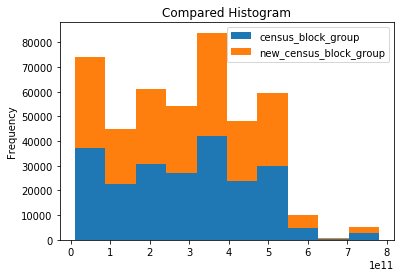

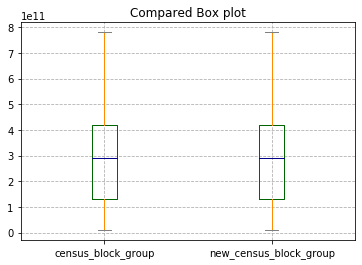

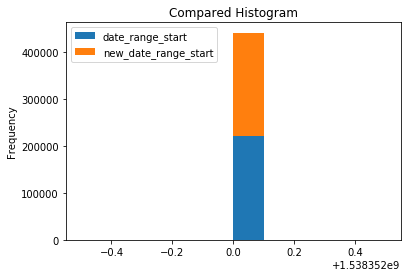

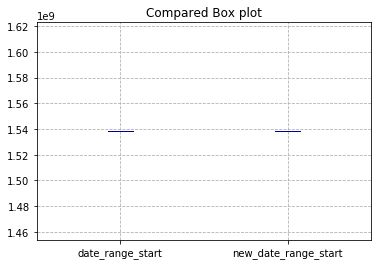

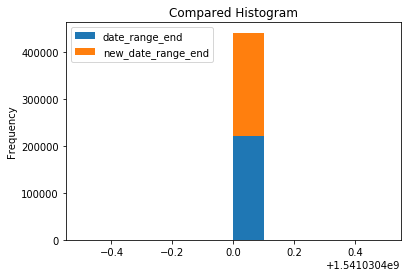

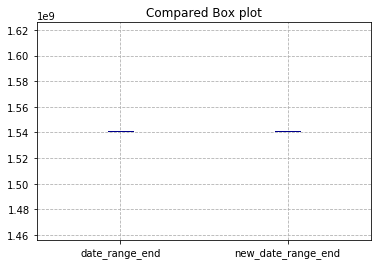

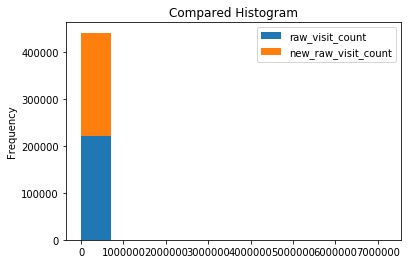

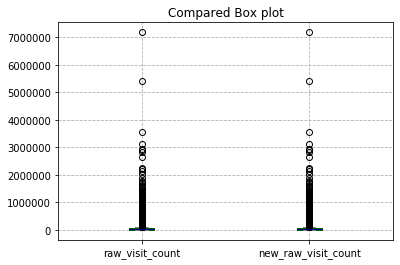

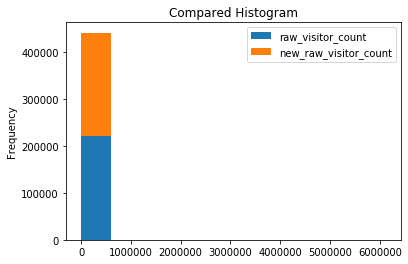

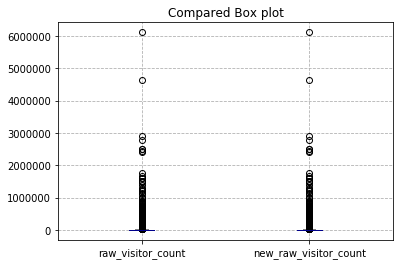

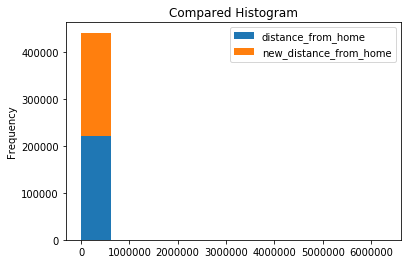

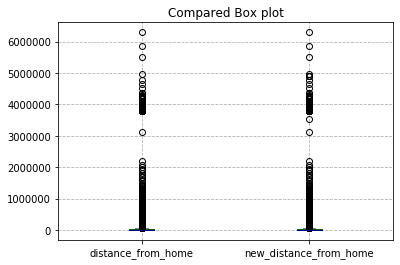

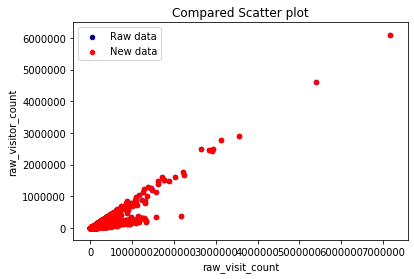

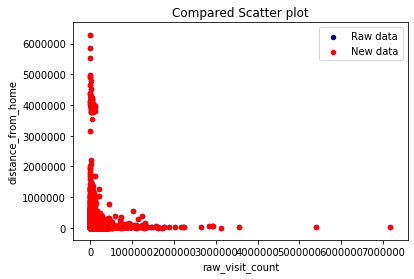

In [18]:
for i in numerical_index:
    histogram_compare(data[i], new_data[i])
    box_plot_compare(data[i], new_data[i])

scatter_plot_compare(data, new_data, 'raw_visit_count', 'raw_visitor_count')
scatter_plot_compare(data, new_data, 'raw_visit_count', 'distance_from_home')

Free the memory

In [19]:
del new_data, new_data_frequency

### 2.4 Fill in missing values by similarity between data objects

#### KNN
find most similar object and fill in missing valus

In [20]:
import sys
from impyute.imputation.cs import fast_knn

# start the KNN training
imputed_training=fast_knn(data[numerical_index].values, k=30)
imputed_data = pd.DataFrame(imputed_training, columns=numerical_index)
nn_data = data.copy()
for index in numerical_index:
    nn_data.loc[:, index] = imputed_data[index]
nn_data.info()

nn_data_frequency = {key: nn_data[key].value_counts() for key in nn_data.columns}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220735 non-null  float64
 1   date_range_start          220735 non-null  float64
 2   date_range_end            220735 non-null  float64
 3   raw_visit_count           220735 non-null  float64
 4   raw_visitor_count         220735 non-null  float64
 5   visitor_home_cbgs         220735 non-null  object 
 6   visitor_work_cbgs         220735 non-null  object 
 7   distance_from_home        220735 non-null  float64
 8   related_same_day_brand    220735 non-null  object 
 9   related_same_month_brand  220735 non-null  object 
 10  top_brands                220735 non-null  object 
 11  popularity_by_hour        220735 non-null  object 
 12  popularity_by_day         220735 non-null  object 
dtypes: float64(6), object(7)
memory usage: 21.9+

#### compare with raw data
There is no missing data of nominal data, so we need no visualization 
numerical data compared visualization
- Compared histogram
- Compared box plot
- Compared scatter plot

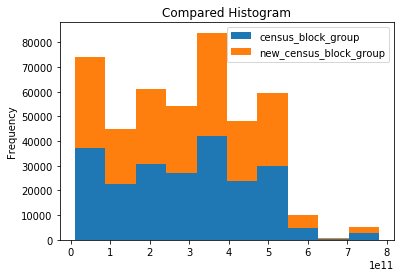

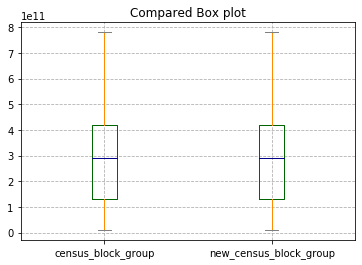

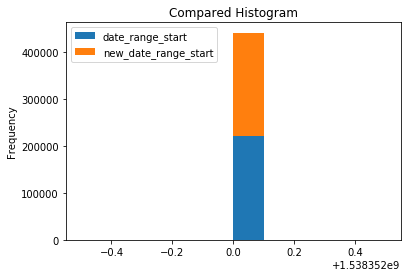

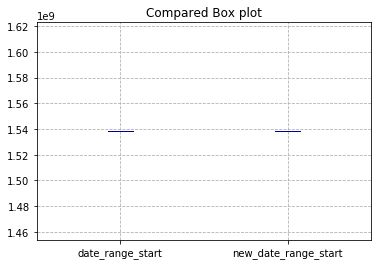

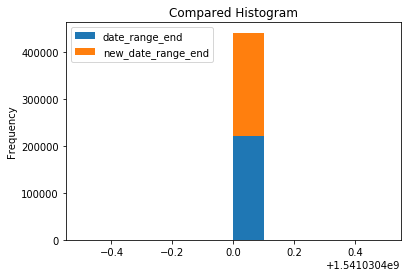

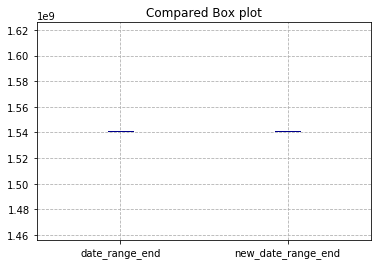

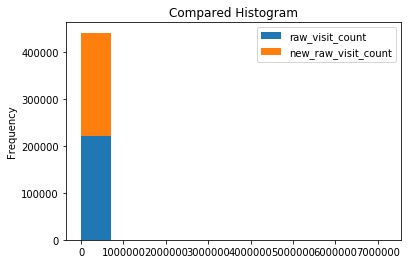

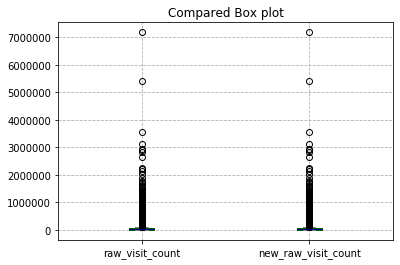

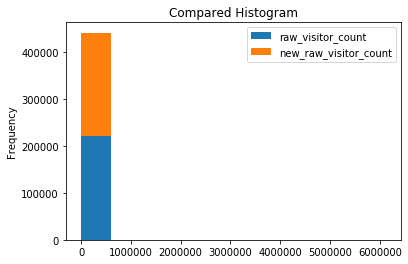

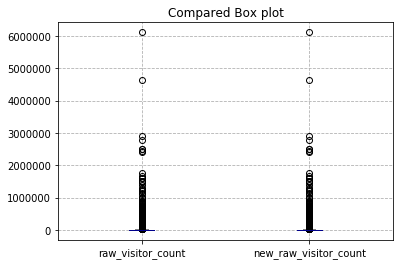

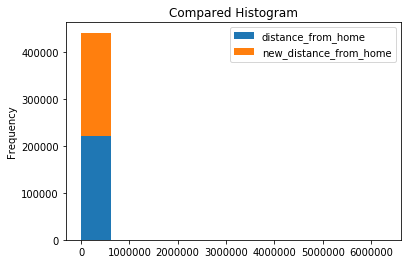

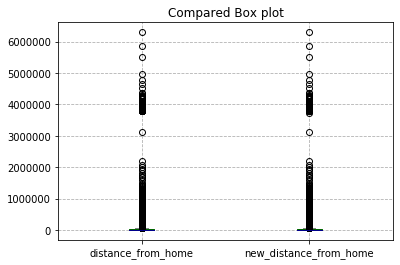

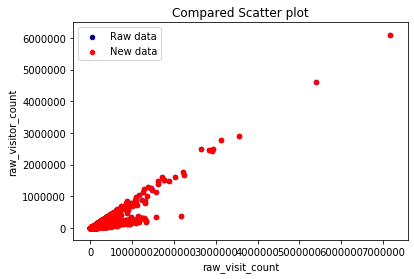

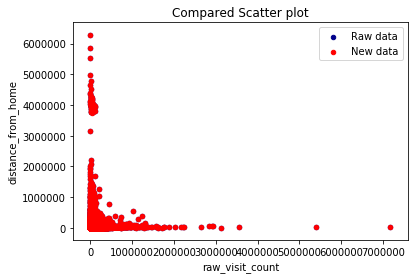

In [21]:
for i in numerical_index:
    histogram_compare(data[i], nn_data[i])
    box_plot_compare(data[i], nn_data[i])

scatter_plot_compare(data, nn_data, 'raw_visit_count', 'raw_visitor_count')
scatter_plot_compare(data, nn_data, 'raw_visit_count', 'distance_from_home')

In [22]:
m, s = divmod(time.time()-timekeeping, 60)
h, m = divmod(m, 60)
print ('run time: %02d:%02d:%02d' % (h, m, s))

run time: 00:07:05
